In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def func(x):
    return np.exp(x)

In [3]:
def second_derivative(f, x, h):
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h))/(12*(h**2))

In [4]:
def epsilon(f, x, h):
    return np.abs(f(x) - second_derivative(f, x, h)) / f(x)

In [5]:
# 定义x和h的取值
x_values = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
h_values = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

In [6]:
# 生成表格数据
columns = ['x'] + [f'h={h:.7f}' for h in h_values] + ['True Value']
data = []
for x in x_values:
    true_val = func(x)
    row = [x]
    for h in h_values:
        approx = second_derivative(func, x, h)
        row.append(approx)
    row.append(true_val)
    data.append(row)

In [7]:
# 创建DataFrame（取消科学计数法）
df = pd.DataFrame(data, columns=columns)
pd.reset_option('display.float_format')  # 重置显示格式为默认
print("二阶导数近似值与真实值表格：")
print(df.to_string(index=False, float_format="{:.8f}".format))  # 显式指定8位小数

二阶导数近似值与真实值表格：
         x  h=0.1000000  h=0.0100000  h=0.0010000  h=0.0001000  h=0.0000100  h=0.0000010  h=0.0000001   True Value
0.00000000   0.99999889   1.00000000   1.00000000   1.00000001   0.99999888   0.99993162   0.99827554   1.00000000
1.00000000   2.71827881   2.71828183   2.71828183   2.71828191   2.71829781   2.71878816   2.85327317   2.71828183
2.00000000   7.38904788   7.38905610   7.38905610   7.38905629   7.38905085   7.39193891   7.14983628   7.38905610
3.00000000  20.08551459  20.08553692  20.08553692  20.08553614  20.08550659  20.07786530  19.45110739  20.08553692
4.00000000  54.59808931  54.59815003  54.59815008  54.59814745  54.59798539  54.61645950  59.92243738  54.59815003
5.00000000 148.41299405 148.41315909 148.41315911 148.41316395 148.41350075 148.47501006 148.02973662 148.41315910


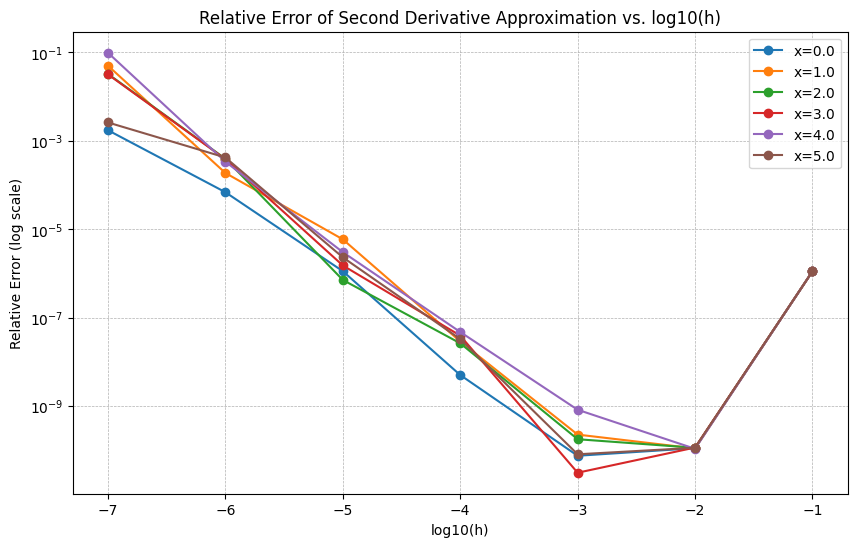

In [8]:
# 绘制相对误差图
plt.figure(figsize=(10, 6))
for x in x_values:
    epsilons = [epsilon(func, x, h) for h in h_values]
    log_h = [np.log10(h) for h in h_values]
    plt.plot(log_h, epsilons, marker='o', linestyle='-', label=f'x={x}')

plt.xlabel('log10(h)')
plt.ylabel('Relative Error (log scale)')
plt.yscale('log')
plt.title('Relative Error of Second Derivative Approximation vs. log10(h)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()